In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
#Reading the csv file of training dataset and storing it in a dataframe
train=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [3]:
#Printing the info and shape of the dataset
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

(39211, 16)

In [4]:
#Printing the number of null values for each features
print(train.isnull().sum())

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


# Data Visualization

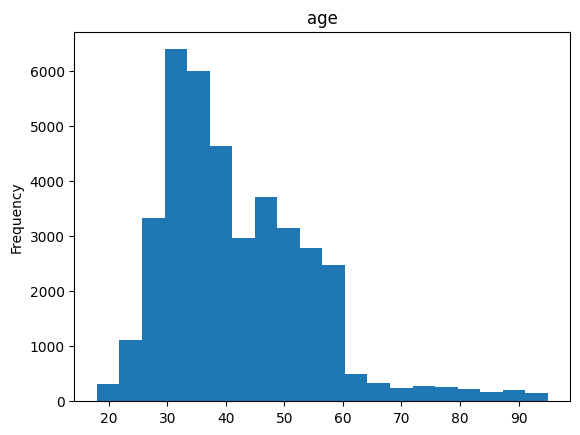

'\nThe distribution is skewed to the right, with peak around 30-40 years old.\nThis indicates that the majority of the data points are younger, and the number of individuals decreases as age increases.\nThe histogram suggests a relatively young population. \n'

In [5]:
#Distribution of feature 'age'
from matplotlib import pyplot as plt
train['age'].plot(kind='hist', bins=20, title='age')
plt.show()
'''
The distribution is skewed to the right, with peak around 30-40 years old.
This indicates that the majority of the data points are younger, and the number of individuals decreases as age increases.
The histogram suggests a relatively young population. 
'''

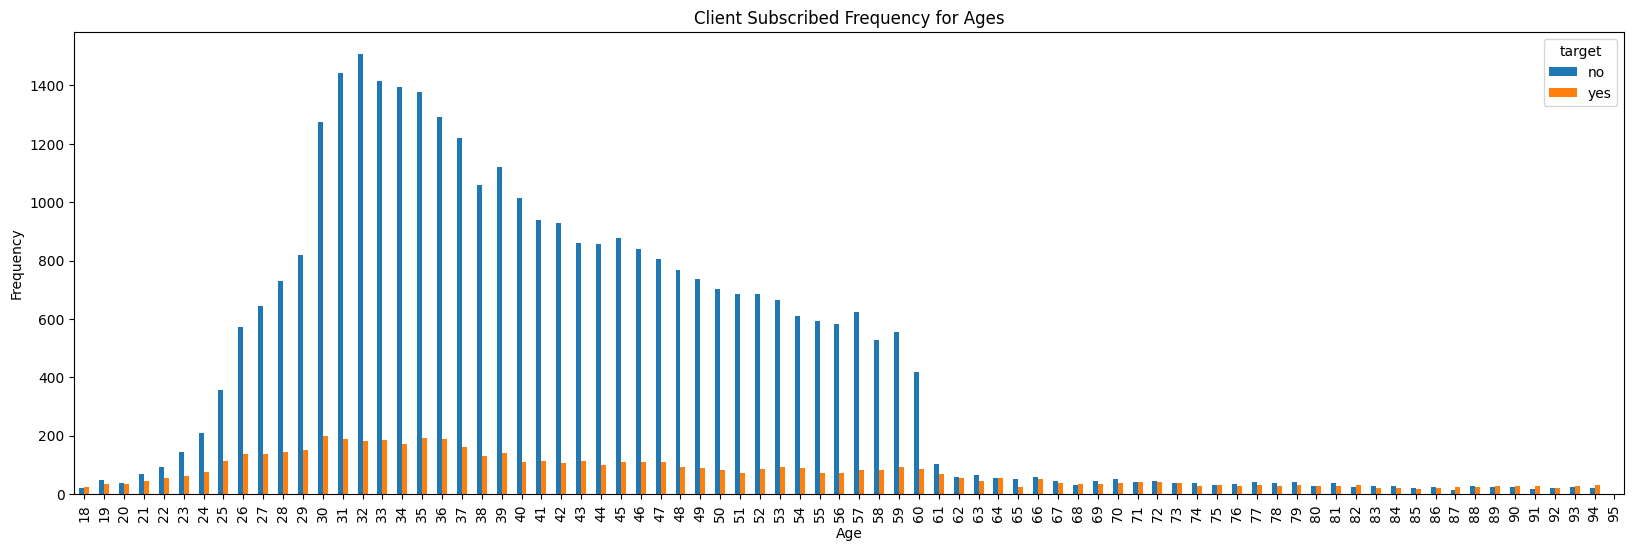

In [6]:
#Feature 'age' with relation to target variable(subscribed to term deposit or not)
pd.crosstab(train.age,train.target).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

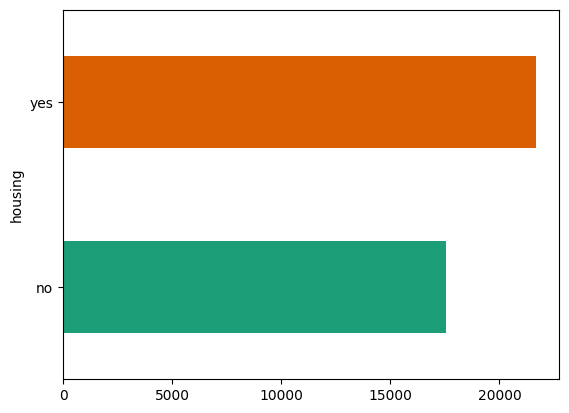

In [7]:
#Visualizing the count of people having housing or not
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

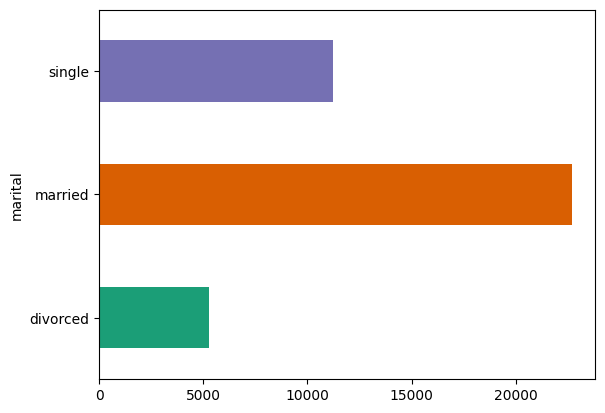

'\nMarital status of people is mostly married followed by single and divorced\n'

In [8]:
#Visualizing the marital status of people

from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

'''
Marital status of people is mostly married followed by single and divorced
'''

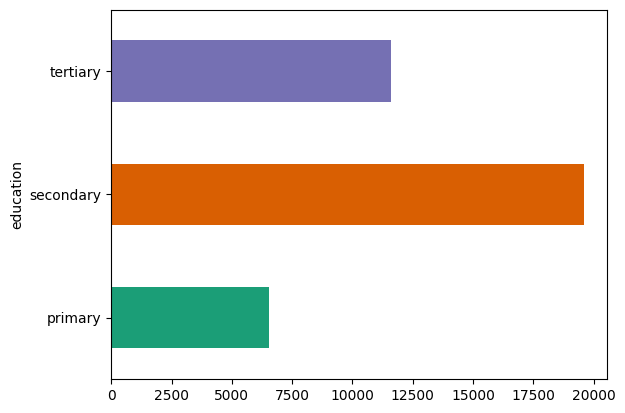

'\nSecondary education is mostly pursued by people followed by tertiary and primary\n'

In [9]:
#Visualizing the education pursued by people
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

'''
Secondary education is mostly pursued by people followed by tertiary and primary
'''

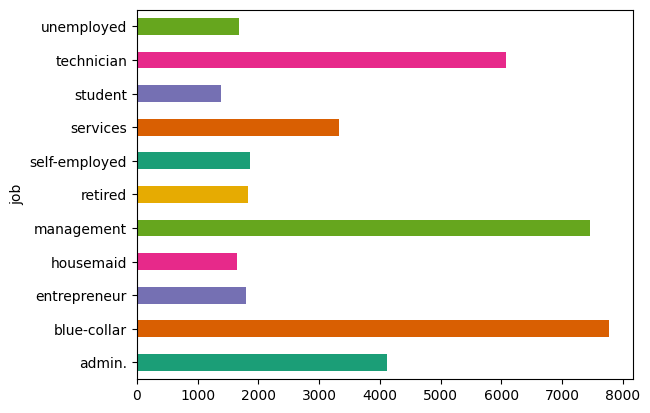

'\nHere we see that people having job type as blue-collar, management and technician \nare mostly present in the dataset \n'

In [10]:
#Visualizing the job type of people
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

'''
Here we see that people having job type as blue-collar, management and technician 
are mostly present in the dataset 
'''

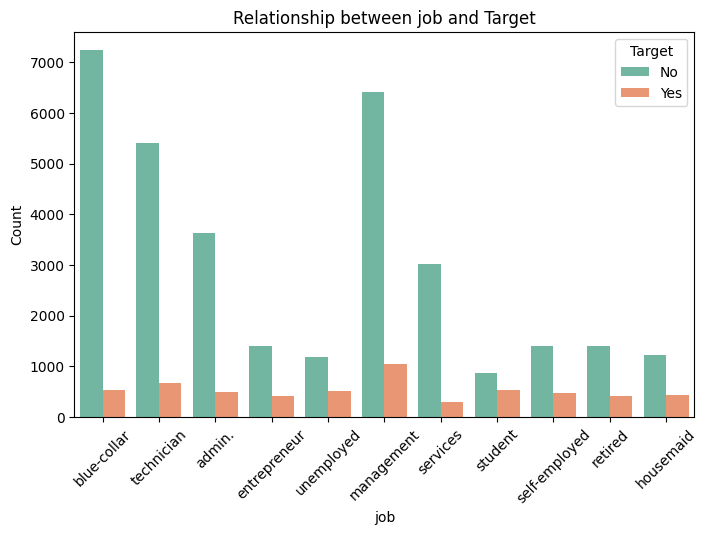

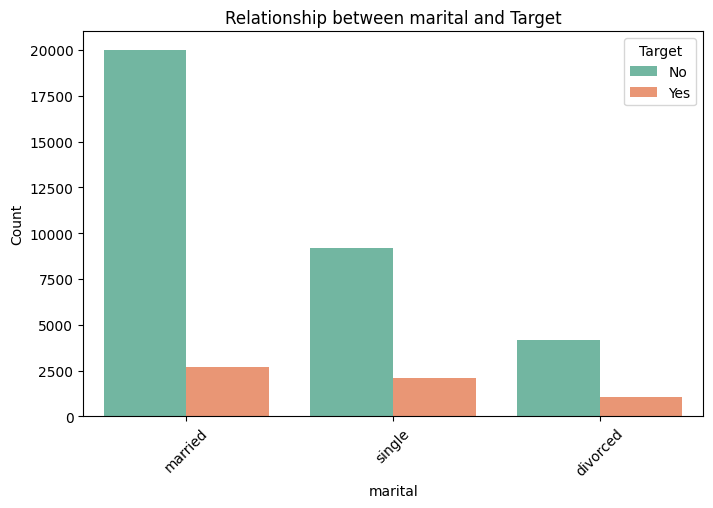

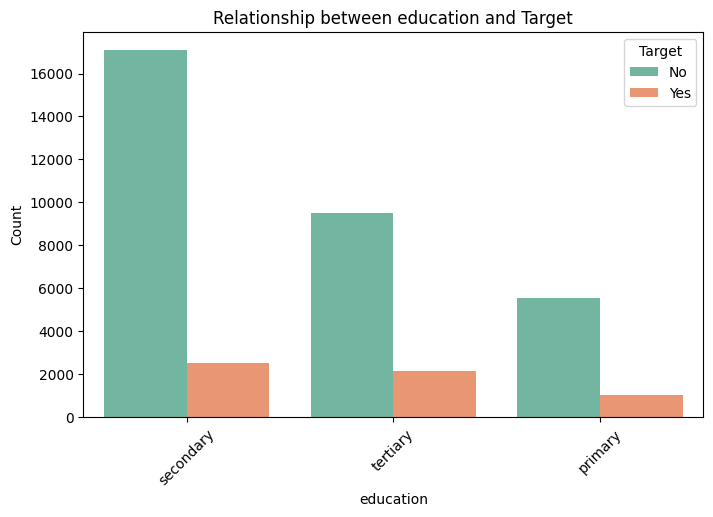

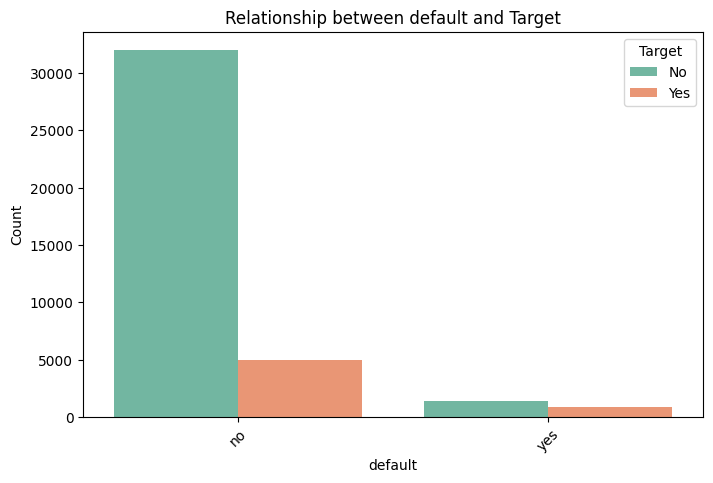

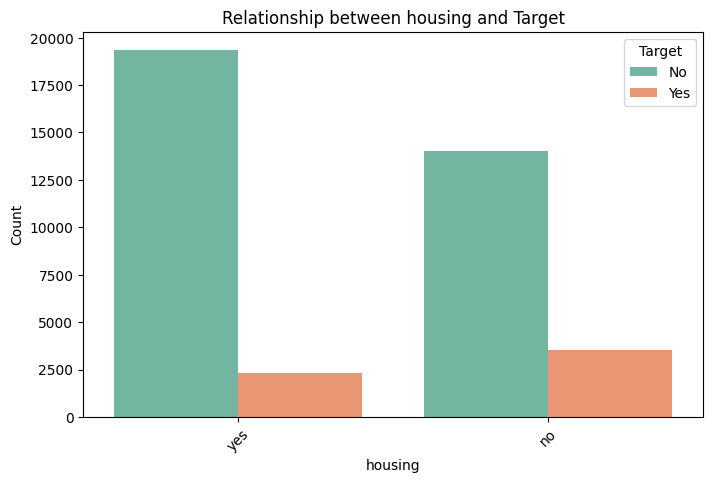

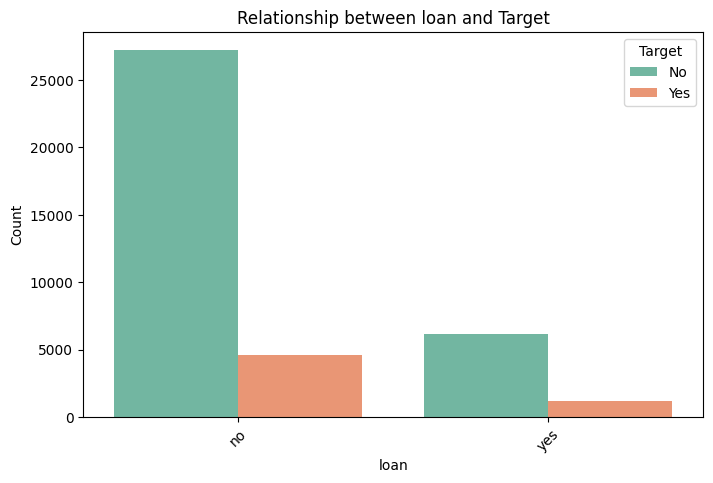

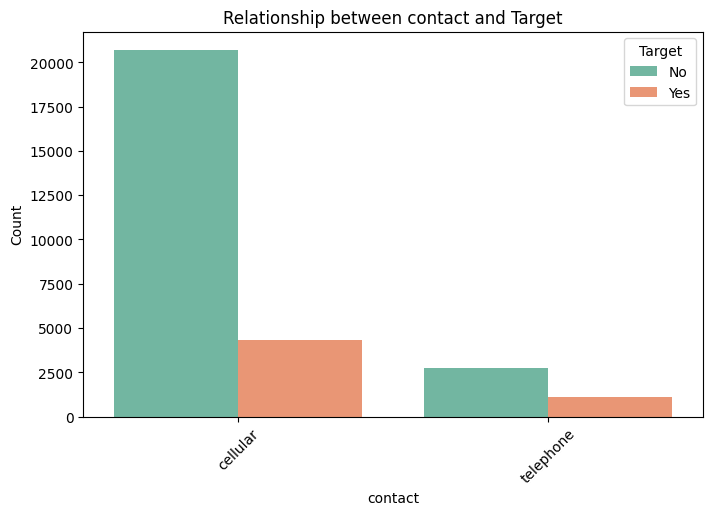

'\nFrom below graphs we see that people having job type as management or technician,\nmarital status as married, education as secondary with no default credit and no personal\nand housing loans tend to subscribe out of total subscribed people.\n\nFrom below graphs we see that people having job type as management or technician,\nmarital status as married, education as secondary with no default credit and no personal\nbut have housing loans tend to not subscribe out of total not subscribed people.\n\n'

In [11]:
#Various categorical features in relation with target variable(subscribed to term deposit or not) 
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
# Loop through each categorical feature and plot its relationship with the target
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, hue='target', palette='Set2')
    plt.title(f'Relationship between {col} and Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

'''
From below graphs we see that people having job type as management or technician,
marital status as married, education as secondary with no default credit and no personal
and housing loans tend to subscribe out of total subscribed people.

From below graphs we see that people having job type as management or technician,
marital status as married, education as secondary with no default credit and no personal
but have housing loans tend to not subscribe out of total not subscribed people.

'''

In [12]:
# Separating target variable from input features
X = train.drop(columns='target') 
y = train['target']

In [13]:
X.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# Split into categorical and numerical features
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome']

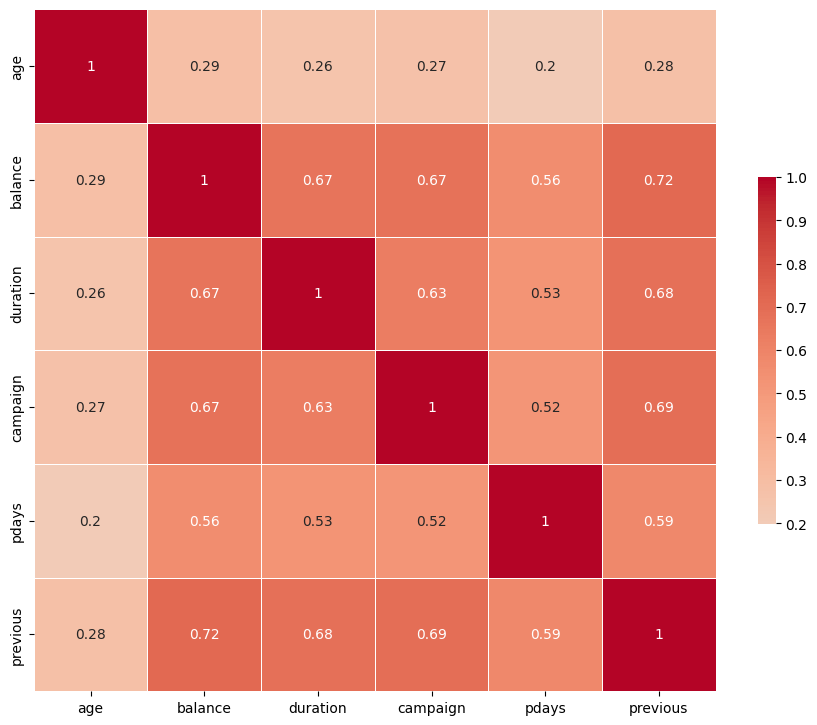

'\nThere seems to be a moderately strong positive correlation between: \ni) balance and duration  \nii) balance and campaign \niii) duration and campaign \niv) balance and previous \nv) duration and previous \nvi) campaign and previous. The correlation between age and other variables is relatively weak.\n'

In [15]:
#This code block plots correlation among numeric features
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlation matrix
corr = X[numeric_features].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

'''
There seems to be a moderately strong positive correlation between: 
i) balance and duration  
ii) balance and campaign 
iii) duration and campaign 
iv) balance and previous 
v) duration and previous 
vi) campaign and previous. The correlation between age and other variables is relatively weak.
'''

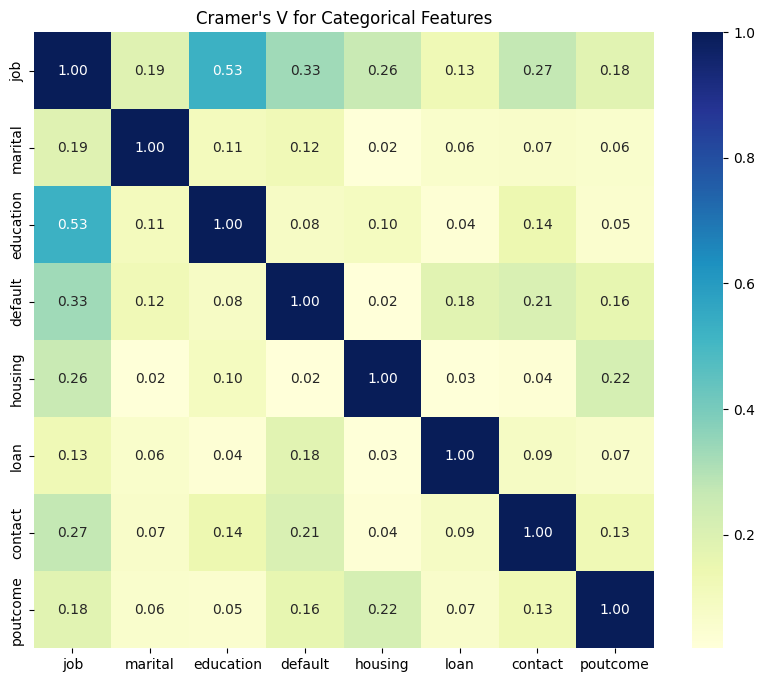

'\nBy observing below figure we can say that categorical features are weakly \ncorrelated with each other\n'

In [16]:
#This code block plots correlation among categorical features
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Example: Calculate Cramer's V between all categorical features
categorical_data = X[categorical_features]
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))),
                                index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_data[col1], categorical_data[col2])

# Plot the Cramer's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cramer's V for Categorical Features")
plt.show()

'''
By observing below figure we can say that categorical features are weakly 
correlated with each other
'''

# Preprocessing of the dataset

In [17]:
#Preprocessing of numeric and categorical features is done.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
impute = SimpleImputer(strategy='most_frequent')
X['job'] = impute.fit_transform(X[['job']]).ravel()
# Preprocessing pipeline

#Numeric features are scaled using Standard scaler.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numeric data
    ('scaler', StandardScaler())])  # Scale the numeric features

#Categorical features are encoded using one hot encoding technique.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),  # Impute missing values with "unknown" for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # OneHotEncoding for categorical features

In [18]:
# Combining numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [19]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training

### 1. Logistic regression model

In [20]:
#Logistic regression model training
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
# Build pipeline with LogisticRegression
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA()),
                           ('classifier', LogisticRegression(random_state=42))])

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],                  # Regularization strength
    'classifier__solver': ['lbfgs', 'liblinear'],   # Solver types
    'classifier__penalty': ['l2'],                  # Regularization type
    'pca__n_components':[5,8,10,12]                 # No. of PCA components
    
}

# RandomizedSearchCV for LogisticRegression
random_search_lr = RandomizedSearchCV(
    estimator=model_lr,
    param_distributions=param_grid_lr,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_lr.fit(X_train, y_train)

# Retrieve results
best_model_lr = random_search_lr.best_estimator_
best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_

print("Best Parameters (Logistic Regression):", best_params_lr)
print("Best Cross-Validation Score (Logistic Regression):", best_score_lr)

# Evaluate on validation set
y_pred_lr = best_model_lr.predict(X_val)
print(classification_report(y_val, y_pred_lr))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (Logistic Regression): {'pca__n_components': 5, 'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 0.1}
Best Cross-Validation Score (Logistic Regression): 0.8539594604256717
              precision    recall  f1-score   support

          no       0.86      0.98      0.92      6645
         yes       0.54      0.15      0.24      1198

    accuracy                           0.85      7843
   macro avg       0.70      0.57      0.58      7843
weighted avg       0.82      0.85      0.81      7843



#### This Logistic regression model upon hyperparameter tuning performed well with 'no' class but it didn't perform well in determining 'yes' class for validation set. For which it also couldn't perform well for the test set and hence the overall accuracy for the test set was affected.

### 2. Naive Bayes classifier model

In [21]:
#Naive Bayes model training
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
# Build pipeline with Gaussian Naive Bayes
model_nb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=10)),
                           ('classifier', GaussianNB())])

# GaussianNB doesn't have hyperparameters to tune, but we can include PCA components
param_grid_nb = {
    'pca__n_components': [8, 10, 12, 15]  # Number of PCA components
}

# RandomizedSearchCV for Naive Bayes
random_search_nb = RandomizedSearchCV(
    estimator=model_nb,
    param_distributions=param_grid_nb,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_nb.fit(X_train, y_train)

# Retrieve results
best_model_nb = random_search_nb.best_estimator_
best_params_nb = random_search_nb.best_params_
best_score_nb = random_search_nb.best_score_

print("Best Parameters (Naive Bayes):", best_params_nb)
print("Best Cross-Validation Score (Naive Bayes):", best_score_nb)

# Evaluate on validation set
y_pred_nb = best_model_nb.predict(X_val)
print(classification_report(y_val, y_pred_nb))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (Naive Bayes): {'pca__n_components': 8}
Best Cross-Validation Score (Naive Bayes): 0.8517598558947956
              precision    recall  f1-score   support

          no       0.88      0.94      0.91      6645
         yes       0.48      0.28      0.35      1198

    accuracy                           0.84      7843
   macro avg       0.68      0.61      0.63      7843
weighted avg       0.82      0.84      0.83      7843



#### This Naive Bayes model upon hyperparameter tuning gave more or less accuracy as that of the default Naive Bayes model. The model performed well with 'no' class but it didn't perform well in determining 'yes' class for the validation set. For which it also couldn't perform well for the test set and hence the overall accuracy for the test set was affected.

### 3. Support vector classifier model

In [22]:
#Support vector classifier model training
from sklearn.svm import SVC

# Build pipeline with SVC
model_svc = Pipeline(steps=[('preprocessor', preprocessor),
                            ('pca', PCA()),
                            ('classifier', SVC(random_state=42))])

# Define parameter grid for SVC
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],                # Regularization parameter
    'classifier__kernel': ['linear', 'rbf'],      # Kernel types
    'classifier__gamma': ['scale', 'auto'],       # Kernel coefficient
    'pca__n_components':[8,10,12,15]
}

# RandomizedSearchCV for SVM
random_search_svc = RandomizedSearchCV(
    estimator=model_svc,
    param_distributions=param_grid_svc,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_svc.fit(X_train, y_train)

# Retrieve results
best_model_svc = random_search_svc.best_estimator_
best_params_svc = random_search_svc.best_params_
best_score_svc = random_search_svc.best_score_

print("Best Parameters (SVM):", best_params_svc)
print("Best Cross-Validation Score (SVM):", best_score_svc)

# Evaluate on validation set
y_pred_svc = best_model_svc.predict(X_val)
print(classification_report(y_val, y_pred_svc))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (SVM): {'pca__n_components': 15, 'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 10}
Best Cross-Validation Score (SVM): 0.8623437696995808
              precision    recall  f1-score   support

          no       0.88      0.96      0.92      6645
         yes       0.59      0.29      0.38      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.62      0.65      7843
weighted avg       0.84      0.86      0.84      7843



#### This Support Vector classifier model upon hyperparameter tuning performed well with 'no' class and performed a bit well in determining 'yes' class  than the previous two models. But unfortunately it didn't cross the cut off score.

### 4. Random Forest classifier model

In [23]:
#Random Forest classifier training

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Build pipeline with RandomForestClassifier
model_rfc = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model
model_rfc.fit(X_train, y_train)

# Predictions on validation set
y_pred_rfc= model_rfc.predict(X_val)

# Evaluate on validation set
print(classification_report(y_val, y_pred_rfc))

              precision    recall  f1-score   support

          no       0.90      0.95      0.92      6645
         yes       0.58      0.40      0.47      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.67      0.70      7843
weighted avg       0.85      0.86      0.85      7843



Confusion Matrix:
[[6293  352]
 [ 721  477]]


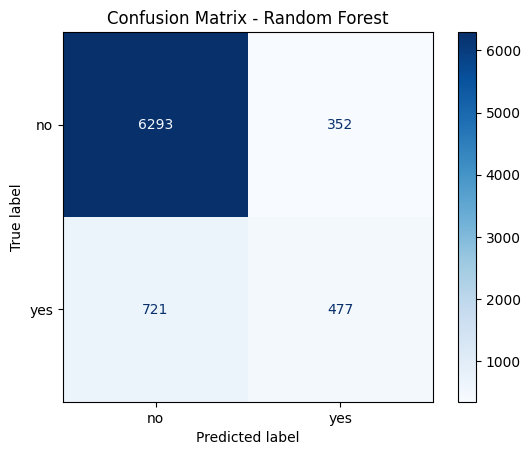

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_rfc)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_rfc.classes_)
disp.plot(cmap='Blues', values_format='d')  # Use 'd' to display integers
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### Out of all the models trained and tested, Random Forest classifier model worked best for the validation and test set both. On hyperparameter tuning, the model tend to overfit and hence the accuracy dropped for the test set. Moreover, the accuracy on validation set didn't improve much on hyperparameter tuning. So without hyperparameter tuning the default Random Forest classifier model performed better and gave more accurate predictions for validation and test set both.

# Submission of predictions using the best model

In [25]:
#Reading the test set, storing it in a dataframe and printing its info
X_test=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [26]:
y_pred=model_rfc.predict(X_test)
submission=pd.DataFrame({"id":range(0,X_test.shape[0]),"target":y_pred})
submission.to_csv('submission.csv',index=False)